0.9818181818181818 0.09090909090909247
5 6
(np.float64(0.8015980113636364), np.float64(-0.8095880681818182))
(np.float64(0.9818181818181818), np.float64(2.090909090909091))


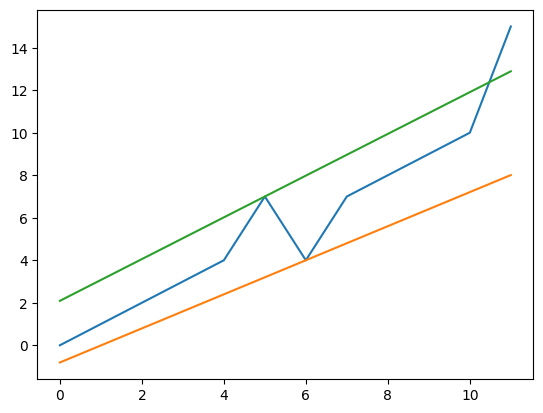

In [19]:
import numpy as np
from trendline_automation import fit_trendlines_single
import matplotlib.pyplot as plt

y = np.array([0, 1, 2, 3, 4, 7, 4, 7, 8, 9, 10, 15])
sub_y = y[:-1]

support_coefs, resist_coefs = fit_trendlines_single(sub_y)
print(support_coefs)
print(resist_coefs)

x = np.arange(len(y))

plt.plot(x,y)
plt.plot(x,x*support_coefs[0]+support_coefs[1])
plt.plot(x,x*resist_coefs[0]+resist_coefs[1])






In [5]:
import pandas as pd
import numpy as np
from flag_pennants.compute import FlagPattern, runAnalysis
# from flag_pennants.plot import plot_patterns

dtype_dict = {
    'Open': 'float64',
    'High': 'float64',
    'Low': 'float64',
    'Close': 'float64',
    'Volume': 'float64'
}

# Define columns to be parsed as dates
date_columns = ['Time']

# Read the CSV file with specified column data types and date parsing
history = pd.read_csv("./Data/History/XAUUSD_M5_2023_formatted.csv", dtype=dtype_dict, parse_dates=date_columns)

_,concat_bear_flag_df_full, concat_bull_flag_df_full, concat_bear_pennant_df_full, concat_bull_pennant_df_full = runAnalysis(history['Close'].to_numpy(), print_results=False)





# # Read the CSV file with specified column data types and date parsing
# data = pd.read_csv("./Data/results/results_df.csv")

# # print(data['bull_flag_wr'].mean())
# # print(data['bear_flag_wr'].mean())
# # print(data['bull_pennant_wr'].mean())
# # print(data['bear_pennant_wr'].mean())


# concat_bear_flag_df_full = pd.read_csv('./Data/results/bear_flag_df.csv')
# concat_bear_pennant_df_full = pd.read_csv('./Data/results/bear_pennant_df.csv')
# concat_bull_pennant_df_full = pd.read_csv('./Data/results/bull_pennant_df.csv')
# concat_bull_flag_df_full = pd.read_csv('./Data/results/bull_flag_df.csv')


100%|██████████| 46/46 [00:34<00:00,  1.33it/s]


In [24]:
concat_bear_pennant_df_full = concat_bear_pennant_df_full.rename(columns={'pennant_width' : 'flag_width', 'pennant_height' : 'flag_height'})
concat_bull_pennant_df_full = concat_bull_pennant_df_full.rename(columns={'pennant_width' : 'flag_width', 'pennant_height' : 'flag_height'})

bull_flag = pd.concat([concat_bull_pennant_df_full, concat_bull_flag_df_full], ignore_index=True)
bear_flag = pd.concat([concat_bear_pennant_df_full, concat_bear_flag_df_full], ignore_index=True)

print((bull_flag['flag_width'] + bull_flag['pole_width']).mean())
print((bull_flag['flag_width'] + bull_flag['pole_width']).min())
print((bull_flag['flag_width'] + bull_flag['pole_width']).max())


75.74613686534217
20.0
216.0


In [36]:
df = pd.read_csv("./Data/History/XAUUSD_M5_2023.csv")
df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) +' ' + df['Timestamp'], format='%Y%m%d %H:%M:%S')

# Drop the original Date and Timestamp columns and changing the order the columns
df = df.drop(columns=['Date'])
df.rename(columns={'Timestamp': 'Time'}, inplace=True)

df.to_csv('./Data/History/XAUUSD_M5_2023_formatted.csv',index=False)

In [5]:
import pandas as pd
df1 = pd.read_csv('./Data/results/bull_flag_df.csv').to_numpy()
df2 = pd.read_csv('./Data/results/bull_pennant_df.csv').to_numpy()

print((df1!=df2).sum())

453
